In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
import matplotlib as mpl
from api_keys import alpha_vantage_key

# Stock Market Section

In [2]:
url="https://www.alphavantage.co/query?"
function="function=TIME_SERIES_DAILY"
apikey="&apikey={alpha_vantage_key}"
output="&outputsize=full"
final_df=pd.DataFrame()

companies={'FB','GOOGL','AAPL','MSFT','TWTR','UNH','HUM','PFE','JNJ','HCA','DAL','BA','CCL','UAL','STWD'
         ,'AMZN','WMT','JCP','TGT','M','JPM','C','BRKB','WFC','BAC'}

In [3]:
for company in companies:
    
    print(company)
    symbol="&symbol="+company
    query_url=url+function+symbol+output+apikey
    print(query_url)
    response = requests.get(query_url).json()
    time.sleep(13)
    #pprint(response.json())

    results_dict=response["Time Series (Daily)"]
    results_df=pd.DataFrame(results_dict)
    results_df_tram=results_df.transpose()
    results_df_tram["Company"]=company
    results_df_tram
    final_df
    frames = [final_df, results_df_tram]
    final_df = pd.concat(frames)
                    #final_df = pd.concat([final_df,ibm_df_tram], axis=1)
final_df

C
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=C&outputsize=full&apikey={alpha_vantage_key}
M
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=M&outputsize=full&apikey={alpha_vantage_key}
PFE
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=PFE&outputsize=full&apikey={alpha_vantage_key}
BA
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=BA&outputsize=full&apikey={alpha_vantage_key}
UAL
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=UAL&outputsize=full&apikey={alpha_vantage_key}
WMT
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=WMT&outputsize=full&apikey={alpha_vantage_key}
TGT
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TGT&outputsize=full&apikey={alpha_vantage_key}
CCL
https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=CCL&outputsize=full&apikey={alpha_vantage_key}
JNJ
https://www.alphavantage.co/query?function=TIME_SERIES

,1. open,2. high,3. low,4. close,5. volume,Company
2020-04-17,43.1500,45.6200,42.6500,45.4500,41222044,C
2020-04-16,42.7100,42.8400,40.1000,40.5200,37429259,C
2020-04-15,43.3700,44.2700,42.6100,42.8600,32210162,C
2020-04-14,47.6600,47.7400,43.5250,45.4200,40405544,C
2020-04-13,47.5000,47.5700,45.2700,46.6800,27917174,C
...,...,...,...,...,...,...
2017-09-14,178.8000,179.1500,178.4000,178.5700,1317528,BRKB
2017-09-13,177.9700,179.1500,177.8100,178.9200,1043905,BRKB
2017-09-12,178.1000,178.7100,177.8000,178.6300,857146,BRKB
2017-09-11,178.2100,179.1400,177.3600,177.8700,1263581,BRKB


In [4]:
final_reset_df = final_df.reset_index()
final_reset_df.to_csv('Data/Stocks_20years_updated.csv',index=False)
final_reset_df

,index,1. open,2. high,3. low,4. close,5. volume,Company
0,2020-04-17,43.1500,45.6200,42.6500,45.4500,41222044,C
1,2020-04-16,42.7100,42.8400,40.1000,40.5200,37429259,C
2,2020-04-15,43.3700,44.2700,42.6100,42.8600,32210162,C
3,2020-04-14,47.6600,47.7400,43.5250,45.4200,40405544,C
4,2020-04-13,47.5000,47.5700,45.2700,46.6800,27917174,C
...,...,...,...,...,...,...,...
104926,2017-09-14,178.8000,179.1500,178.4000,178.5700,1317528,BRKB
104927,2017-09-13,177.9700,179.1500,177.8100,178.9200,1043905,BRKB
104928,2017-09-12,178.1000,178.7100,177.8000,178.6300,857146,BRKB
104929,2017-09-11,178.2100,179.1400,177.3600,177.8700,1263581,BRKB


In [5]:
file = 'Data/Stocks_20years_updated.csv'
stock_data = pd.read_csv(file).rename(columns={'index':'Date',
                                              '1. open':'Open',
                                              '2. high':'High',
                                              '3. low':'Low',
                                              '4. close':'Close',
                                              '5. volume':'Volume'})
stock_data = stock_data[stock_data['Date']>'2020-02-05'].reset_index()
final_stock_df = stock_data.drop(columns='index')


In [6]:
Technology=['FB','GOOGL','AAPL','MSFT','TWTR']
HealthCare=['UNH','HUM','PFE','JNJ','HCA']
Travel=['DAL','BA','CCL','UAL','STWD']
Retail=['AMZN','WMT','JCP','TGT','M']
Finance=['JPM','C','BRKB','WFC','BAC']
final_stock_df['Sector']=''

In [7]:
def f(row):
    if row['Company'] in Technology:
        value = 'Technology'
    elif row['Company'] in HealthCare:
        value = 'Healthcare'
    elif row['Company'] in Travel:
        value = 'Travel'
    elif row['Company'] in Retail:
        value = 'Retail'
    elif row['Company'] in Finance:
        value = 'Finance'
    return value
final_stock_df['Sector'] = final_stock_df.apply(f,axis=1)

In [8]:
final_stock_df

,Date,Open,High,Low,Close,Volume,Company,Sector
0,2020-04-17,43.15,45.62,42.6500,45.45,41222044,C,Finance
1,2020-04-16,42.71,42.84,40.1000,40.52,37429259,C,Finance
2,2020-04-15,43.37,44.27,42.6100,42.86,32210162,C,Finance
3,2020-04-14,47.66,47.74,43.5250,45.42,40405544,C,Finance
4,2020-04-13,47.50,47.57,45.2700,46.68,27917174,C,Finance
...,...,...,...,...,...,...,...,...
1195,2020-02-12,48.22,48.49,47.7600,47.79,16649936,WFC,Finance
1196,2020-02-11,48.08,48.34,47.9422,47.99,13683726,WFC,Finance
1197,2020-02-10,47.67,47.86,47.4200,47.77,18120198,WFC,Finance
1198,2020-02-07,47.73,48.00,47.4750,47.84,13171487,WFC,Finance


In [9]:
#Stock Weekly price DataFrame
final_stock_df['Date']=pd.to_datetime(final_stock_df['Date'])
final_date= final_stock_df.groupby(['Sector',pd.Grouper(key='Date',freq='W')])['Open','High','Low','Close'].mean()
final_index_df = final_date.reset_index(['Sector']).sort_values('Date',ascending=False)
final_week_df = final_index_df[['Sector','Close']].pivot(columns='Sector',values='Close')
final_week_df.head()

C:\Users\write\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Sector,Finance,Healthcare,Retail,Technology,Travel
Date,,,,,
2020-02-09,74.6925,197.1010,462.778880,446.6460,109.2300
2020-02-16,74.8900,200.4740,479.382080,454.2144,110.4092
2020-02-23,74.0025,201.8615,479.358485,453.6245,108.4440
2020-03-01,66.5815,179.5344,436.411616,410.1924,94.7904
2020-03-08,62.1680,188.1884,433.673616,405.6072,86.3680


In [10]:
#Stock Daily price DataFrame
final_stock_testing = final_stock_df[['Date','Sector','Close']].groupby(['Sector','Date']).mean().reset_index(['Sector'])
final_day_df = final_stock_testing.pivot(columns='Sector',values='Close')
final_day_df

Sector,Finance,Healthcare,Retail,Technology,Travel
Date,,,,,
2020-02-06,74.8075,198.532,459.87116,446.814,109.988
2020-02-07,74.5775,195.670,465.68660,446.478,108.472
2020-02-10,74.6700,195.276,476.61602,453.586,109.880
2020-02-11,74.9625,197.520,479.99204,451.390,110.456
2020-02-12,75.0100,203.346,482.33914,455.618,111.810
2020-02-13,74.9775,204.060,480.60906,454.454,110.404
2020-02-14,74.8300,202.168,477.35414,456.024,109.496
2020-02-18,73.6200,201.590,481.98256,456.306,109.314
2020-02-19,74.3375,203.816,484.45852,458.406,109.062


Text(0.5, 0, 'Date (Weekly)')

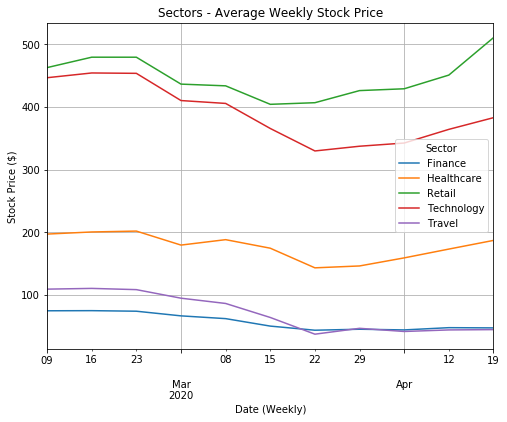

In [11]:
#Stock weekly price chart
ax = final_week_df.plot.line(figsize=(8,6),title='Sectors - Average Weekly Stock Price',grid=True)
ax.set_ylabel('Stock Price ($)')
ax.set_xlabel('Date (Weekly)')

Text(0.5, 0, 'Date (Daily; Nov 2019-Apr 2020)')

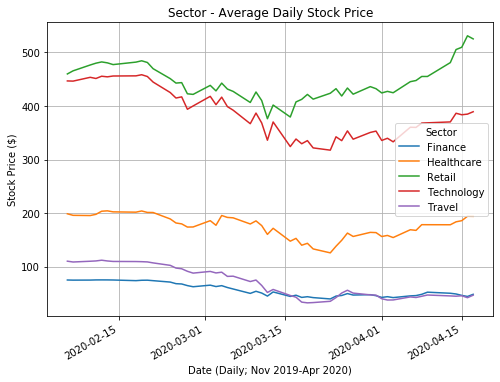

In [12]:
#Stock Daily price chart
ax = final_day_df.plot.line(figsize=(8,6),title='Sector - Average Daily Stock Price',grid=True)
ax.set_ylabel('Stock Price ($)')
ax.set_xlabel('Date (Daily; Nov 2019-Apr 2020)')

In [13]:
#final_index_df.to_csv('Data/Stocks_20years_samples.csv',index=False)


# Coronavirus Section

In [14]:
# Load in csv
corona_df = pd.read_csv("Data/Full_corona_latest.csv")
Date_sum_df = corona_df.groupby(['date']).sum()

Date_sum_df.head()
Date_sum_df.reset_index().head()


,date,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200228,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,9.0,9.0,53,0.0,0.0,0.0,0.0,0.0
1,20200229,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.0,18.0,18.0,53,1.0,0.0,0.0,9.0,9.0
2,20200301,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,40.0,40.0,40.0,123,3.0,0.0,0.0,12.0,12.0
3,20200302,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,53.0,53.0,53.0,123,3.0,0.0,0.0,13.0,13.0
4,20200303,94.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,100.0,100.0,123,3.0,0.0,6.0,41.0,47.0


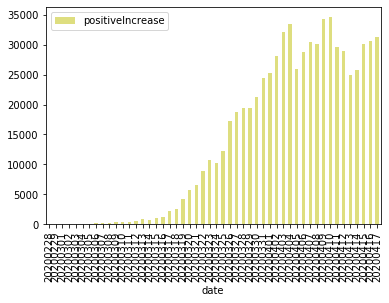

In [15]:
#Graph #1 Positive Cases vs Date YTD
Date_sum_df[['positiveIncrease']].plot.bar(color='y', alpha=0.5, align="center")
plt.rcParams['figure.figsize'] = (100,100)
plt.style.use('ggplot')


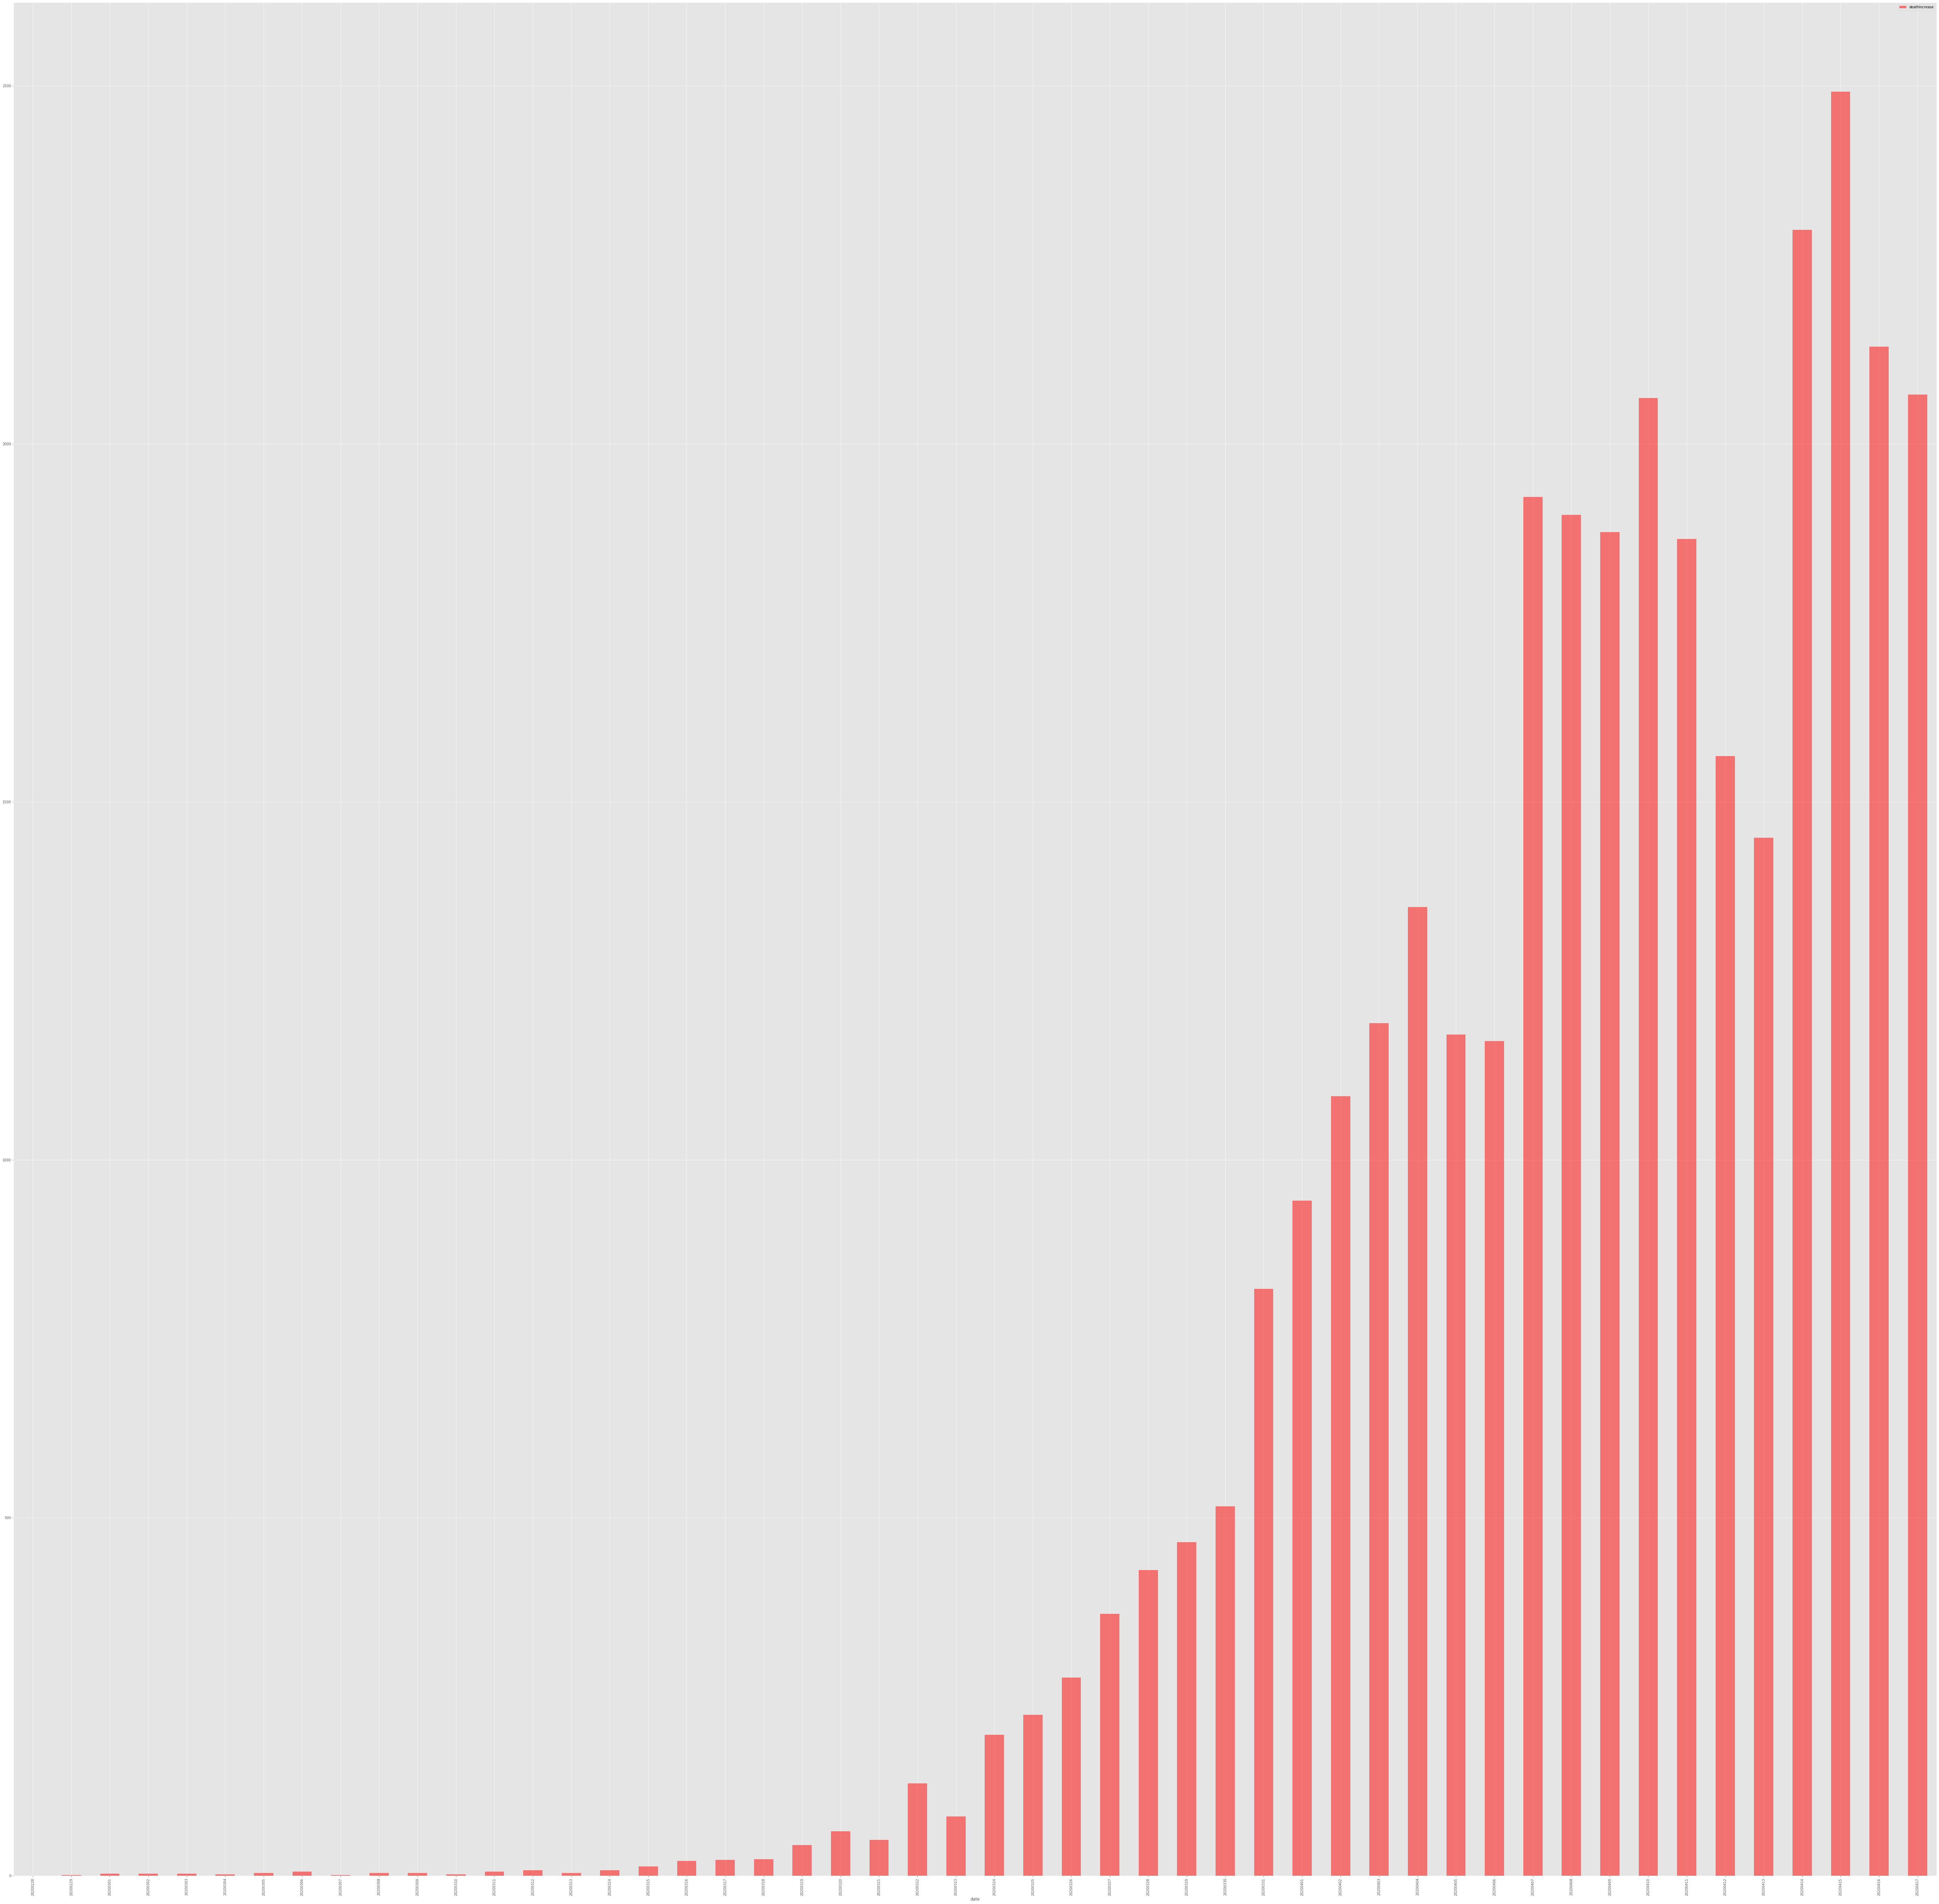

In [16]:
#Graph #2 Positive Cases vs Date YTD
Date_sum_df[['deathIncrease']].plot.bar(color='r', alpha=0.5, align="center")
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

In [17]:
# x_values = corona_df["deathIncrease"]
# y_values = corona_df["positiveIncrease"]
# plt.scatter(x_values,y_values)
# plt.xlabel('Increase in Death')
# plt.ylabel('Increase in Positive cases)')
# plt.show()

# Stock Market & Coronavirus

The r-squared is: 0.41593367891471517
The correlation coefficient between Stock Market and Coronavirus cases is -0.64


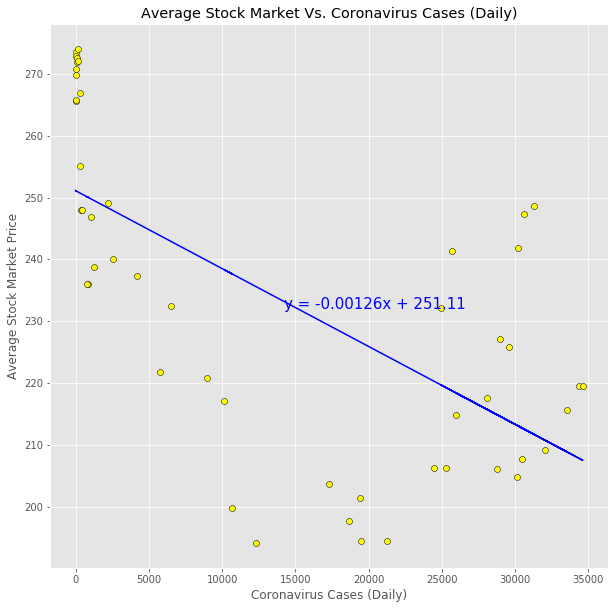

In [18]:
corona_scatter = Date_sum_df[['positiveIncrease']]
stock_scatter = final_stock_df[['Date','Close']].loc[final_stock_df['Date']>'2020-02-05'].groupby(['Date']).mean()

plt.scatter(corona_scatter,stock_scatter,marker="o", facecolors="yellow", edgecolors="black",alpha=1.00)
plt.title('Average Stock Market Vs. Coronavirus Cases (Daily)')
plt.xlabel('Coronavirus Cases (Daily)')
plt.ylabel('Average Stock Market Price')

mpl.rcParams['figure.figsize']=(13,10)
plt.rcParams.update({'font.size': 8})

x_values = corona_scatter['positiveIncrease']
y_values = stock_scatter['Close']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-",color='blue')
plt.annotate(line_eq,(14200,232),fontsize=15,color='blue')
print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between Stock Market and Coronavirus cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],stock_scatter['Close'])[0],2)}")

<Figure size 936x720 with 0 Axes>

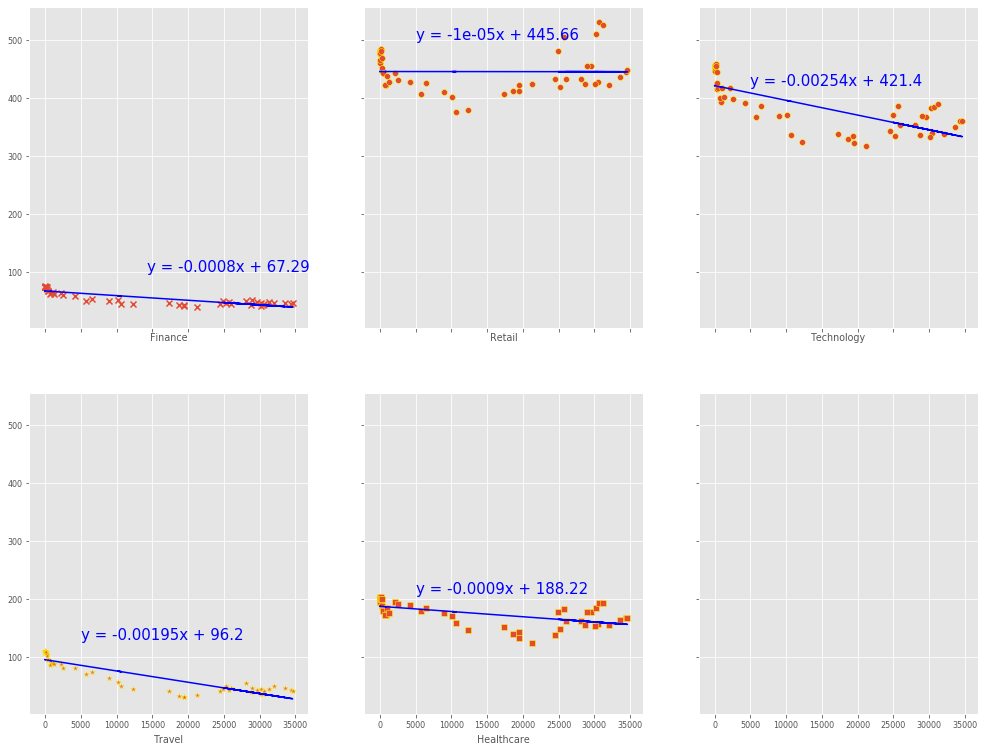

The correlation coefficient between Finance Sector and Coronavirus cases is -0.84
The correlation coefficient between Technology Sector and Coronavirus Cases is -0.74
The correlation coefficient between Travel Sector and Coronavirus Cases is -0.89
The correlation coefficient between Retail Sector and Coronavirus Cases is -0.0
The correlation coefficient between HealthCare Sector and Coronavirus Cases is -0.57


In [19]:
#final_day_df=final_day_df.index.loc[final_day_df.index >'2020-02-05']
scatter_finance = final_day_df[['Finance']]
scatter_healthcare =final_day_df[['Healthcare']]
scatter_retail =final_day_df[['Retail']]
scatter_technology =final_day_df[['Technology']]
scatter_travel =final_day_df[['Travel']]




f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 3, sharex=True, sharey = True,figsize=(17,13))
#norm=plt.Normalize(-22,22)

##Finance Subplot Chart
sc = axes[0][0].scatter(corona_scatter,scatter_finance, marker = "x",edgecolors="yellow",alpha=1.00)
axes[0][0].set_xlabel('Finance', labelpad = 5)

finance_x_values = corona_scatter['positiveIncrease']
finance_y_values = scatter_finance['Finance']
(slope, intercept, rvalue, pvalue, stderr) = linregress(finance_x_values, finance_y_values)
regress_values_finance = finance_x_values * slope + intercept
line_eq_finance = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[0][0].plot(finance_x_values,regress_values_finance,"r-",color='blue')
axes[0][0].annotate(line_eq_finance,(14200,100),fontsize=15,color='blue')


##Retail Subplot Chart
axes[0][1].scatter(corona_scatter,scatter_retail, marker = 'o',edgecolors="yellow",alpha=1.00)
axes[0][1].set_xlabel('Retail', labelpad = 5)

retail_x_values = corona_scatter['positiveIncrease']
retail_y_values = scatter_retail['Retail']
(slope, intercept, rvalue, pvalue, stderr) = linregress(retail_x_values, retail_y_values)
regress_values_retail = retail_x_values * slope + intercept
line_eq_retail = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[0][1].plot(retail_x_values,regress_values_retail,"r-",color='blue')
axes[0][1].annotate(line_eq_retail,(5000,500),fontsize=15,color='blue')


##Travel Subplot Chart
axes[1][0].scatter(corona_scatter,scatter_travel, marker = '*',edgecolors="yellow",alpha=0.75)
axes[1][0].set_xlabel('Travel',labelpad = 5)

travel_x_values = corona_scatter['positiveIncrease']
travel_y_values = scatter_travel['Travel']
(slope, intercept, rvalue, pvalue, stderr) = linregress(travel_x_values, travel_y_values)
regress_values_travel = travel_x_values * slope + intercept
line_eq_travel = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[1][0].plot(travel_x_values,regress_values_travel,"r-",color='blue')
axes[1][0].annotate(line_eq_travel,(5000,130),fontsize=15,color='blue')

##HealthCare Subplot Chart
axes[1][1].scatter(corona_scatter,scatter_healthcare, marker = 's',edgecolors="yellow",alpha=1.00)
axes[1][1].set_xlabel('Healthcare',labelpad = 5)

healthcare_x_values = corona_scatter['positiveIncrease']
healthcare_y_values = scatter_healthcare['Healthcare']
(slope, intercept, rvalue, pvalue, stderr) = linregress(healthcare_x_values, healthcare_y_values)
regress_values_healthcare = healthcare_x_values * slope + intercept
line_eq_healthcare = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[1][1].plot(healthcare_x_values,regress_values_healthcare,"r-",color='blue')
axes[1][1].annotate(line_eq_healthcare,(5000,210),fontsize=15,color='blue')



axes[0][2].scatter(corona_scatter,scatter_technology, marker = 'o',edgecolors="yellow",alpha=1.00)
axes[0][2].set_xlabel('Technology', labelpad = 5)

technology_x_values = corona_scatter['positiveIncrease']
technology_y_values = scatter_technology['Technology']
(slope, intercept, rvalue, pvalue, stderr) = linregress(technology_x_values, technology_y_values)
regress_values_technology = technology_x_values * slope + intercept
line_eq_technology = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
axes[0][2].plot(technology_x_values,regress_values_technology,"r-",color='blue')
axes[0][2].annotate(line_eq_technology,(5000,420),fontsize=15,color='blue')


plt.show()
print(f"The correlation coefficient between Finance Sector and Coronavirus cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_finance['Finance'])[0],2)}")
print(f"The correlation coefficient between Technology Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_technology['Technology'])[0],2)}")
print(f"The correlation coefficient between Travel Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_travel['Travel'])[0],2)}")
print(f"The correlation coefficient between Retail Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_retail['Retail'])[0],2)}")
print(f"The correlation coefficient between HealthCare Sector and Coronavirus Cases is {round(st.pearsonr(corona_scatter['positiveIncrease'],scatter_healthcare['Healthcare'])[0],2)}")


In [20]:
scatter_finance

new_scatter_finance=scatter_finance
new_scatter_finance
Expected_value=new_scatter_finance["Finance"][0]
Expected_value
new_scatter_finance["Expected Value"]=Expected_value
new_scatter_finance.rename(columns = {'Finance':'Observed Value'},inplace=True)
new_scatter_finance

C:\Users\write\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\write\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Sector,Observed Value,Expected Value
Date,,
2020-02-06,74.8075,74.8075
2020-02-07,74.5775,74.8075
2020-02-10,74.6700,74.8075
2020-02-11,74.9625,74.8075
2020-02-12,75.0100,74.8075
2020-02-13,74.9775,74.8075
2020-02-14,74.8300,74.8075
2020-02-18,73.6200,74.8075
2020-02-19,74.3375,74.8075


In [21]:
degree_of_freedom=len(new_scatter_finance)
degree_of_freedom
critical_value = st.chi2.ppf(q = 0.95, df = degree_of_freedom)
critical_value

67.5048065495412

In [22]:
st.chisquare(new_scatter_finance['Observed Value'], new_scatter_finance['Expected Value'])

Power_divergenceResult(statistic=334.4738215586674, pvalue=3.8298109202584516e-44)

In [23]:
scatter_retail

new_scatter_retail=scatter_retail
new_scatter_retail
Ret_Expected_value=new_scatter_retail["Retail"][0]
Ret_Expected_value
Values=[]
for i in range(len(new_scatter_retail)):
    Values.append(Ret_Expected_value)
    Ret_Expected_value=Ret_Expected_value-3
new_scatter_retail["Expected Value"]=Values
new_scatter_retail
new_scatter_retail.rename(columns = {'Retail':'Observed Value'},inplace=True)
new_scatter_retail

C:\Users\write\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\write\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Sector,Observed Value,Expected Value
Date,,
2020-02-06,459.87116,459.87116
2020-02-07,465.68660,456.87116
2020-02-10,476.61602,453.87116
2020-02-11,479.99204,450.87116
2020-02-12,482.33914,447.87116
2020-02-13,480.60906,444.87116
2020-02-14,477.35414,441.87116
2020-02-18,481.98256,438.87116
2020-02-19,484.45852,435.87116


In [24]:
degree_of_freedom=len(new_scatter_retail)
degree_of_freedom
critical_value = st.chi2.ppf(q = 0.95, df = degree_of_freedom)
critical_value

67.5048065495412

In [25]:
st.chisquare(new_scatter_retail['Observed Value'], new_scatter_retail['Expected Value'])

Power_divergenceResult(statistic=980.4665700463271, pvalue=1.7370178027443758e-173)

In [26]:
scatter_healthcare

new_scatter_healthcare=scatter_healthcare
new_scatter_healthcare
Expected_value=new_scatter_healthcare["Healthcare"][0]
Expected_value
new_scatter_healthcare["Expected Value"]=Expected_value
new_scatter_healthcare.rename(columns = {'Healthcare':'Observed Value'},inplace=True)
new_scatter_healthcare


C:\Users\write\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\write\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Sector,Observed Value,Expected Value
Date,,
2020-02-06,198.532,198.532
2020-02-07,195.670,198.532
2020-02-10,195.276,198.532
2020-02-11,197.520,198.532
2020-02-12,203.346,198.532
2020-02-13,204.060,198.532
2020-02-14,202.168,198.532
2020-02-18,201.590,198.532
2020-02-19,203.816,198.532


In [27]:
degree_of_freedom=len(new_scatter_healthcare)
degree_of_freedom
critical_value = st.chi2.ppf(q = 0.95, df = degree_of_freedom)
critical_value

67.5048065495412

In [28]:
st.chisquare(new_scatter_healthcare['Observed Value'], new_scatter_healthcare['Expected Value'])

Power_divergenceResult(statistic=239.2742921040435, pvalue=7.339402744500518e-27)

In [29]:
scatter_travel

new_scatter_travel=scatter_travel
new_scatter_travel
Trv_Expected_value=new_scatter_travel["Travel"][0]
Trv_Expected_value
Values=[]
for i in range(len(new_scatter_travel)):
    Values.append(Trv_Expected_value)
    Trv_Expected_value=Trv_Expected_value-1.75
new_scatter_travel["Expected Value"]=Values
new_scatter_travel
new_scatter_travel.rename(columns = {'Travel':'Observed Value'},inplace=True)
new_scatter_travel

C:\Users\write\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\write\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Sector,Observed Value,Expected Value
Date,,
2020-02-06,109.988,109.988
2020-02-07,108.472,108.238
2020-02-10,109.880,106.488
2020-02-11,110.456,104.738
2020-02-12,111.810,102.988
2020-02-13,110.404,101.238
2020-02-14,109.496,99.488
2020-02-18,109.314,97.738
2020-02-19,109.062,95.988


In [30]:
degree_of_freedom=len(new_scatter_travel)
degree_of_freedom
critical_value = st.chi2.ppf(q = 0.95, df = degree_of_freedom)
critical_value

67.5048065495412

In [31]:
st.chisquare(new_scatter_travel['Observed Value'], new_scatter_travel['Expected Value'])

Power_divergenceResult(statistic=148.40103303433466, pvalue=6.180140102282203e-12)

In [32]:
scatter_technology
new_scatter_technology=[]
new_scatter_technology=scatter_technology
new_scatter_technology
Tec_Expected_value=new_scatter_technology["Technology"][0]
Tec_Expected_value
Values=[]
for i in range(len(new_scatter_technology)):
    Values.append(Tec_Expected_value)
    Tec_Expected_value=Tec_Expected_value-1.75
new_scatter_technology["Expected Value"]=Values
new_scatter_technology
new_scatter_technology.rename(columns = {'Technology':'Observed Value'},inplace=True)
new_scatter_technology

C:\Users\write\.conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\write\.conda\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Sector,Observed Value,Expected Value
Date,,
2020-02-06,446.814,446.814
2020-02-07,446.478,445.064
2020-02-10,453.586,443.314
2020-02-11,451.390,441.564
2020-02-12,455.618,439.814
2020-02-13,454.454,438.064
2020-02-14,456.024,436.314
2020-02-18,456.306,434.564
2020-02-19,458.406,432.814


In [33]:
degree_of_freedom=len(new_scatter_technology)
degree_of_freedom
critical_value = st.chi2.ppf(q = 0.95, df = degree_of_freedom)
critical_value

67.5048065495412

In [34]:
st.chisquare(new_scatter_technology['Observed Value'], new_scatter_technology['Expected Value'])

Power_divergenceResult(statistic=157.48472485289656, pvalue=2.593871751760174e-13)